---------------------------------------------- Loading the NYC_restaurants.csv file into a dataframe------------------------

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)
len(df)
df.columns.values

array(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET',
       'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE',
       'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
       'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADE DATE', 'RECORD DATE',
       'INSPECTION TYPE'], dtype=object)

In [30]:
len(df)

44633

-------------------------------------------------- Solutions ------------------------------------------------------

# Q1 
Create a unique name for each restaurant.


In [31]:
#create new column -> combines DBA, BUILDING, STREET, ZIPCODE, and BORO fields
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + " " + df['ZIPCODE'] + ' ' + df['BORO'] 

df['RESTAURANT'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# Q2
How many restaurants are included in the data?

In [32]:
df_q2 = df.drop_duplicates(subset = 'RESTAURANT')
len(df_q2['DBA'])

# there are 10112 restaurants in this file 

10101

# Q3
How many chains are there?

In [33]:
DBA_occurence = df_q2['DBA'].value_counts() #len = 8816 

#chain restaurant
chain = DBA_occurence[DBA_occurence  >= 2]  

#not a chain restaurant
not_a_chain = DBA_occurence[DBA_occurence == 1]  

len(chain) 

368

# Q4
Plot a bar graph of the top 20 most popular chains.

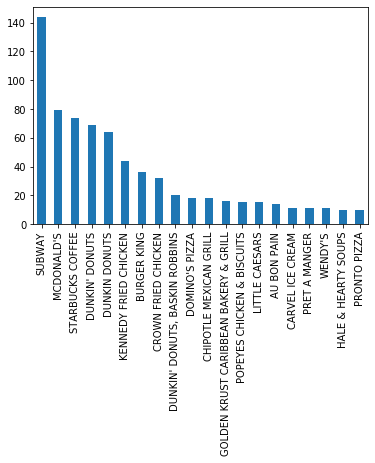

In [34]:
chain[:20].plot(kind = 'bar')

# Q5 
What fraction of all restaurants are chain restaurants?

In [35]:
fraction = sum(chain) / len(df_q2['RESTAURANT'])
fraction
#16.4%

0.16424116424116425

# Q6
Plot the number of non-chain restaurants in each boro.

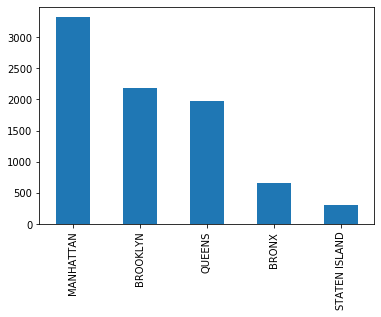

In [36]:
#select BORO and RESTAURANT from full dataset 
df_q6 = df_q2[df_q2['BORO'] != 'Missing'][['BORO', 'DBA']]

#set index
df_q6_tmp = df_q6.set_index('DBA')

#create series
df_q6_tmp_series = df_q6_tmp['BORO']

#plot only non-chain restaurants based on BORO
mask2 = df_q6_tmp_series.index.value_counts() == 1
df_q6_nonchain = df_q6_tmp_series[mask2].value_counts()
df_q6_nonchain

df_q6_final_plot = df_q6_nonchain.plot(kind = 'bar')

# Q7
Plot the fraction of non-chain restaurants in each boro.

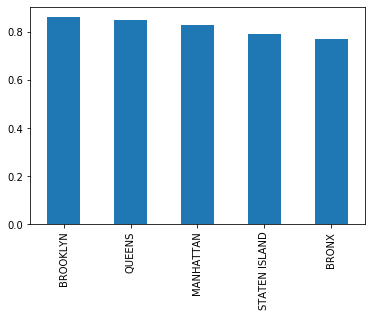

In [37]:
#Divides the number of non-chain restaurants per borough by the total number of restaurants per borough
q7_total = df_q6_tmp['BORO'].value_counts()
df_q7 = df_q6_nonchain / q7_total

df_q7.sort_values(ascending = False).plot(kind = 'bar')

#### Despite having the most independent restaurants, Manhattan does not have the highest ratio of independent restaurants.

# Q8
Plot the popularity of cuisines.

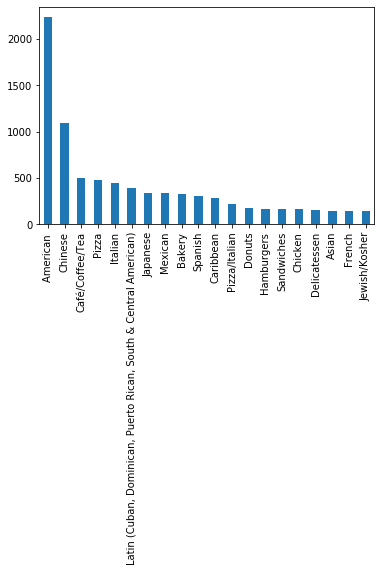

In [38]:
#Create DataFrame of 'CUISINE DESCRIPTION' indexed by 'RESTAURANT' from our DF of unique restaurants. 
cuisine = df_q2[['CUISINE DESCRIPTION', 'RESTAURANT']]
cuisine_temp = cuisine.set_index('RESTAURANT')
cuisine_temp_series = cuisine_temp['CUISINE DESCRIPTION']

q8_final_plot = cuisine_temp_series.value_counts()[:20].plot(kind = 'bar')

# Q9
Plot the cuisines among restaurants which never got cited for violations.

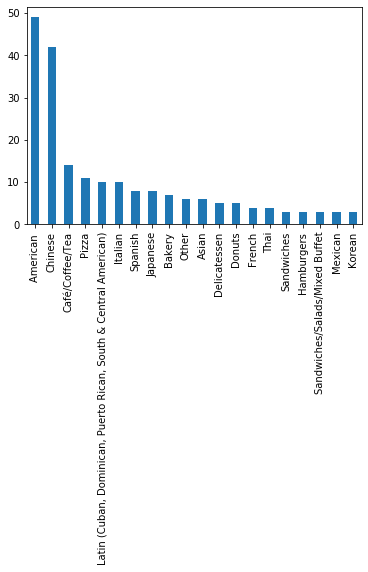

In [39]:
#Create mask from restaurants that are NAN and do not appear in the list of restaurants that recieved a violation
violation = df[df['VIOLATION CODE'].notnull()]
no_violation = df[df['VIOLATION CODE'].isnull()]
mask = ~no_violation['RESTAURANT'].isin(violation['RESTAURANT'])

df_q9_temp_series = no_violation[mask]
q9_final = df_q9_temp_series.drop_duplicates('RESTAURANT')['CUISINE DESCRIPTION'].value_counts()
q9_final_plot = q9_final[:20].plot(kind = 'bar')

# Q10
What cuisines tend to be the “cleanest”?

In [40]:
#creating mask for cuisines with atleast 20 restaurant listings
mask = df.drop_duplicates(subset = ['CUISINE DESCRIPTION','RESTAURANT'])['CUISINE DESCRIPTION'].value_counts() >= 20

list_of_cuisines = df.drop_duplicates(subset = ['CUISINE DESCRIPTION','RESTAURANT'])['CUISINE DESCRIPTION'].value_counts()[mask]

#filtering my input for cuisines with atleast 20 restaurant listings
mask_2 = df['CUISINE DESCRIPTION'].isin(list_of_cuisines.index)
filtered_df = df[mask_2]

#popularity count
q8_count = filtered_df.drop_duplicates(subset = ['CUISINE DESCRIPTION', 'RESTAURANT'])['CUISINE DESCRIPTION'].value_counts()

#clean restaurants / popularity count for cuisines with atleast 20 restaurant listings
q10_final = q9_final / q8_count

#printing the top 10 cuisines
q10_final = q10_final.sort_values(ascending=False)[:10]
print(q10_final)

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64


# Q11
What are the most common violations in each borough?

In [41]:
#Change all 'BORO' values labeled as missing to NaN
mask = (df['BORO'] == 'Missing')
df.loc[mask, 'BORO'] = np.nan 

#Return the 'VIOLATION DESCRIPTION' with the highest count for each 'BORO' 
df_q11 = pd.crosstab(df['BORO'], df['VIOLATION DESCRIPTION'])
df_q11.idxmax(axis = 1)

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

# Q12
What are the most common violations per borough, 
after normalizing for the relative abundance of each violation?

In [42]:
#Get overall frequencies
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()

#Normalize
q12_normalize = df_q11 / violationFrequency

#Find the biggest violations
q12_normalize.idxmax(axis = 1)

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

# Q13
How many phone area codes correspond to a single zipcode?

In [43]:
#Create new column 'AREA CODE' from first 3 numbers of 'PHONE'
def areaCode(number):
    return number[:3]
INPUT_DEDUPED = df.drop_duplicates(subset = 'RESTAURANT') 
INPUT_DEDUPED['AREA CODE'] = INPUT_DEDUPED['PHONE'].apply(lambda x: areaCode(x))

#Change any blank 'AREA CODE' into NaN
mask = (INPUT_DEDUPED['AREA CODE'] == '___')
INPUT_DEDUPED.loc[mask, 'AREA CODE'] = np.nan 

#Find 'AREA CODE' allign with a single 'ZIPCODE'
Df_unique = INPUT_DEDUPED.drop_duplicates(subset=['ZIPCODE', 'AREA CODE'])
mask_q13 = Df_unique['AREA CODE'].value_counts()
final_q13 = mask_q13[mask_q13 == 1]

len(final_q13)

C:\Users\Andre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Andre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


35

# Q14
Find common misspellings of street names

In [44]:
#Function to find the last word in a string
def lastWord(string): 
    temp_list = list(string.split(" "))
    return temp_list[len(temp_list)-1]

#Function to return all but last word in a stringg
def notLastWord(string):
    temp_list = list(string.split(" "))
    return " ".join(temp_list[:-1])        
 
#Creates 'STREET TYPE', 'STREET BASE', and 'STREET BASE & ZIP' Columns
df['STREET TYPE'] = df['STREET'].apply(lambda x: lastWord(x))
df['STREET BASE'] = df['STREET'].apply(lambda x: notLastWord(x))
df['STREET BASE & ZIP'] = df['STREET BASE'] + " " + df['ZIPCODE']

#Creates DF from 'STREET TYPE', 'STREET BASE', and 'STREET BASE & ZIP' and merges them on 'STREET BASE & ZIP'
street_table = DataFrame(df, columns = ['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']).drop_duplicates()

street_table_merged = street_table.merge(street_table,
                                         left_on = 'STREET BASE & ZIP',
                                         right_on = 'STREET BASE & ZIP')

#Create cross tab where 'STREET TYPE' differed and returns most common street types that occured for AVE, ST, RD, PL, BOULEARD,and BULEVARD. 
street_table_different = street_table_merged[street_table_merged['STREET TYPE_x'] != street_table_merged['STREET TYPE_y']] 
xtab_street_table_different = pd.crosstab(street_table_different['STREET TYPE_x'], street_table_different['STREET TYPE_y']) 
xtab_street_table_different[['AVE', 'ST', 'RD', 'PL','BOULEARD', 'BULEVARD']].idxmax()


STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object